<a href="https://colab.research.google.com/github/arvinantobahtiar/Data-normalization-quantile-and-log-method/blob/main/data_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [43]:
df = pd.read_csv("/content/bhp.csv", index_col= 0)
df.head(10)

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, Electronic City Phase II to Doddathoguru
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            13200 non-null  object 
 1   total_sqft      13200 non-null  float64
 2   bath            13200 non-null  float64
 3   price           13200 non-null  float64
 4   bhk             13200 non-null  int64  
 5   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 721.9+ KB


In [47]:
df.total_sqft.describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [116]:
df.sort_values(by='total_sqft', ascending=True).head(10)

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
other,7 BHK,5.0,7.0,115.0,7,2300000
other,3 Bedroom,11.0,3.0,74.0,3,672727
other,1 BHK,15.0,1.0,30.0,1,200000
other,5 Bedroom,24.0,2.0,150.0,5,625000
Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
other,1 BHK,250.0,2.0,40.0,1,16000
Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333


<Axes: xlabel='total_sqft', ylabel='Count'>

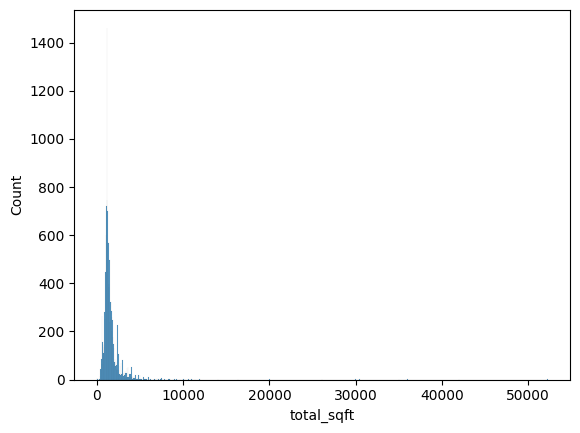

In [48]:
sns.histplot(df.total_sqft)

In [97]:
up_limit_quant = df.total_sqft.quantile(0.90)
bottom_limit_quant = df.total_sqft.quantile(0.001)
up_limit_quant, bottom_limit_quant

(2400.0, 319.975)

In [99]:
df_pre1 = df[(df.total_sqft < up_limit_quant) & (df.total_sqft > bottom_limit_quant)]
df_pre1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, Electronic City Phase II to Doddathoguru
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            11684 non-null  object 
 1   total_sqft      11684 non-null  float64
 2   bath            11684 non-null  float64
 3   price           11684 non-null  float64
 4   bhk             11684 non-null  int64  
 5   price_per_sqft  11684 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 639.0+ KB


<Axes: xlabel='total_sqft', ylabel='Count'>

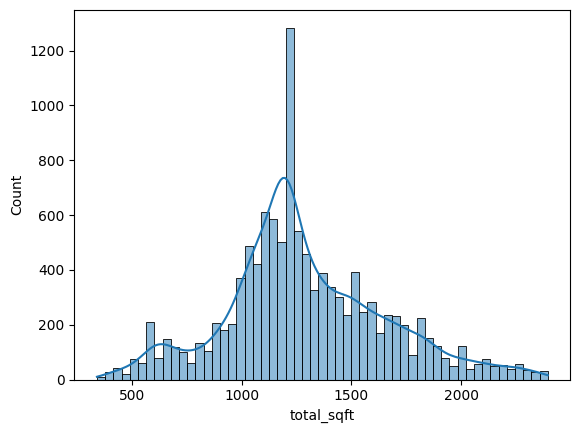

In [106]:
sns.histplot(df_pre1.total_sqft, kde=True)

In [108]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_pre1[['total_sqft','price','price_per_sqft']])
df_pre1[['total_sqft','price','price_per_sqft']] = scaled
print(scaled)

[[0.34824903 0.02852941 0.01444919]
 [0.53501946 0.05028463 0.01790604]
 [0.57441634 0.08159393 0.02897253]
 ...
 [0.66877432 0.09772296 0.03059827]
 [0.38959144 0.0483871  0.02334231]
 [0.10214008 0.00759013 0.01097522]]


<ipython-input-108-be0182e5bc1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre1[['total_sqft','price','price_per_sqft']] = scaled


<Axes: xlabel='total_sqft', ylabel='Count'>

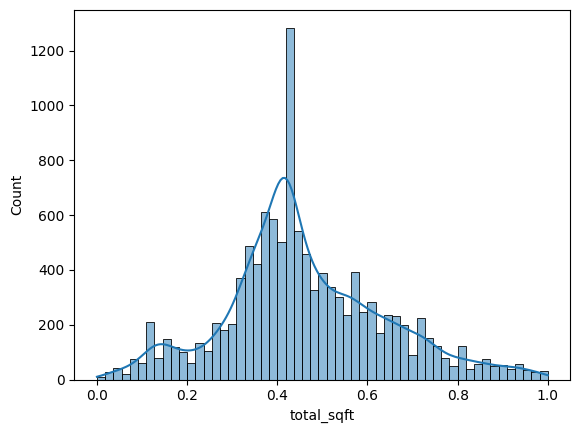

In [113]:
sns.histplot(df_pre1.total_sqft, kde=True)

In [115]:
df_pre1.head(10)

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
Electronic City Phase II,2 BHK,0.348249,2.0,0.028529,2,0.014449
Uttarahalli,3 BHK,0.535019,2.0,0.050285,3,0.017906
Lingadheeranahalli,3 BHK,0.574416,3.0,0.081594,3,0.028973
Kothanur,2 BHK,0.418288,2.0,0.039848,2,0.017592
Whitefield,2 BHK,0.403696,2.0,0.027514,2,0.011871
Marathahalli,3 BHK,0.471790,3.0,0.051471,3,0.020889
other,6 Bedroom,0.330739,6.0,0.342505,6,0.200269
Whitefield,3 BHK,0.710117,2.0,0.057875,3,0.015527
7th Phase JP Nagar,2 BHK,0.321012,2.0,0.027514,2,0.015025
